<a href="https://colab.research.google.com/github/kiro357/fantastic-lamp/blob/master/Data_cleaning_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1. Google Play Store apps and reviews
In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.


*   apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.




In [ ]:
# Drop duplicates
import numpy
import pandas as pd
apps_with_duplicates = pd.read_csv ('apps.csv')

print(apps_with_duplicates.shape)
apps = apps_with_duplicates.drop_duplicates()
print(apps.shape)
apps.head(5)
# Print the total number of apps
#print('Total number of apps in the dataset = ', len(apps))
# Have a look at a random sample of 5 rows
#n = 5
#apps.sample(n)

(9659, 14)
(9659, 14)


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#2. Data cleaning
The three features that we will be working with most frequently henceforth are Installs, Size, and Price.


*   the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.




In [ ]:
# List of characters to remove
chars_to_remove = ['+', 'k', 'M', '$', ',']
# List of column names to clean
cols_to_clean = ['Installs', 'Size', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
      if char in col :
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])
print(apps.shape)

NameError: ignored

#3. Exploring app categories
* Which category has the highest share of 
(active) apps in the market?
* Is any specific category dominating the market?
* Which categories have the fewest number of apps?

In [ ]:
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)
num_apps_in_category

NameError: ignored

In [ ]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

Average app rating =  4.173243045387998



#4. Size and price of an app
Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive.
How can we effectively come up with strategies to size and price our app?

* Does the size of an app affect its rating?
* Do users really care about system-heavy apps or do they prefer light-weighted apps?
* Does the price of an app affect its rating?
* Do users always prefer free apps over paid apps?

We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under \$10.

In [ ]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
 
# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()
 
# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')
 
# Subset out apps whose type is 'Paid'
paid_apps = apps[apps['Type'] == 'Paid']
 
# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])


NameError: ignored

#5. Relation between app category and app price.
Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to \$80! All game apps are reasonably priced below \$20.

NameError: ignored

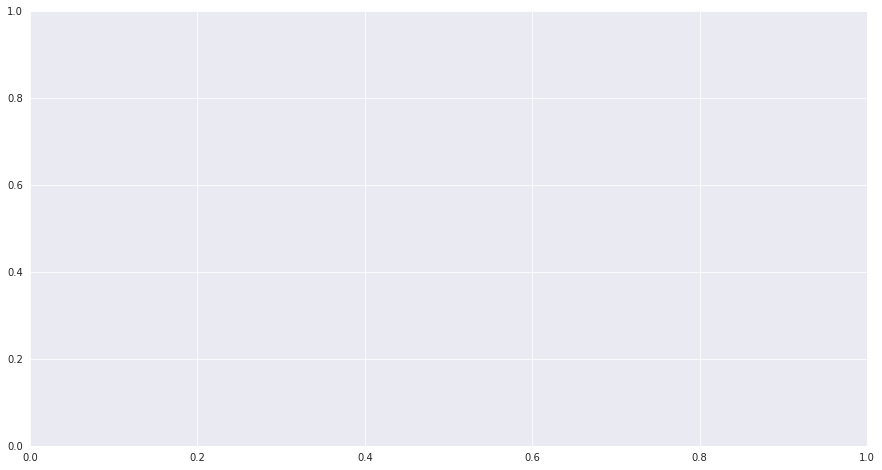

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

#6. Filter out "junk" apps.
Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these junk apps and re-do our visualization. The distribution of apps under \$20 becomes clearer.

In [ ]:
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=False, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

NameError: ignored

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_before_duplicates = pd.read_csv ('user_reviews.csv')
data_after_duplicates = data_before_duplicates.drop_duplicates ()

ax1 = sns.stripplot(x=data_after_duplicates['Sentiment'], y=data_after_duplicates['Sentiment_Polarity'])
ax = sns.stripplot(x=ax1, y=data_after_duplicates['Sentiment_Subjectivity'])


FileNotFoundError: ignored

In [ ]:
import pandas as pd
data=pd.read_csv('apps.,csv')
print(data.sa)

FileNotFoundError: ignored